<a href="https://colab.research.google.com/github/shan9193/Personal-finance-advisor-using-ML/blob/Today's-work/Personal_finance_advisor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
url = "https://raw.githubusercontent.com/shan9193/Personal-finance-advisor-using-ML/refs/heads/main/data.csv"
df = pd.read_csv(url)

In [ ]:
df.shape

(20000, 27)

In [ ]:
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,20000.0,41585.496104,40014.540538,1301.187333,17604.875957,30185.383480,51765.446460,1.079728e+06
Age,20000.0,41.031450,13.578725,18.000000,29.000000,41.000000,53.000000,6.400000e+01
Dependents,20000.0,1.995950,1.417616,0.000000,1.000000,2.000000,3.000000,4.000000e+00
Rent,20000.0,9115.494629,9254.228188,235.365692,3649.422246,6402.751824,11263.940492,2.159457e+05
Loan_Repayment,20000.0,2049.800292,4281.789941,0.000000,0.000000,0.000000,2627.142320,1.230807e+05
Insurance,20000.0,1455.028761,1492.938435,30.002012,580.204749,1017.124681,1787.160895,3.873493e+04
Groceries,20000.0,5205.667493,5035.953689,154.078240,2165.426419,3741.091535,6470.892718,1.198169e+05
Transport,20000.0,2704.466685,2666.345648,81.228584,1124.578012,1933.845509,3360.597508,8.186150e+04
Eating_Out,20000.0,1461.856982,1481.660811,39.437523,581.011801,1029.109726,1807.075251,3.440610e+04
Entertainment,20000.0,1448.853658,1489.019270,45.421469,581.632906,1020.198376,1790.104082,3.866737e+04


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.corr(numeric_only = True)

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
Income,1.000000,-0.005201,0.016926,0.939370,0.447598,0.944395,0.985717,0.981955,0.939673,0.943594,...,0.944510,0.881518,0.851086,0.838267,0.799650,0.812415,0.832575,0.768083,0.646553,0.805790
Age,-0.005201,1.000000,-0.011342,-0.007258,-0.000737,-0.002321,-0.004604,-0.006702,-0.005207,-0.003771,...,-0.005363,-0.002634,-0.008521,-0.006494,-0.004979,0.000539,-0.006346,-0.005591,-0.009966,-0.013153
Dependents,0.016926,-0.011342,1.000000,0.018390,-0.002468,0.018162,0.016375,0.015371,0.015744,0.015720,...,0.009293,-0.059502,0.021444,0.019211,0.009970,0.010645,0.012556,0.014607,0.237070,0.016267
Rent,0.939370,-0.007258,0.018390,1.000000,0.419682,0.894195,0.926205,0.922790,0.878156,0.885604,...,0.858403,0.732520,0.795361,0.796904,0.745848,0.765975,0.789790,0.719458,0.610576,0.753787
Loan_Repayment,0.447598,-0.000737,-0.002468,0.419682,1.000000,0.429958,0.438350,0.433747,0.413322,0.425665,...,0.311471,0.106274,0.368029,0.398728,0.339241,0.378230,0.363552,0.339905,0.284429,0.371172
Insurance,0.944395,-0.002321,0.018162,0.894195,0.429958,1.000000,0.928354,0.927134,0.882410,0.890283,...,0.886320,0.810917,0.797137,0.791154,0.753159,0.767430,0.779164,0.715983,0.618554,0.764189
Groceries,0.985717,-0.004604,0.016375,0.926205,0.438350,0.928354,1.000000,0.967789,0.929536,0.931417,...,0.925797,0.858575,0.861040,0.827819,0.793967,0.800435,0.820303,0.757205,0.628757,0.793543
Transport,0.981955,-0.006702,0.015371,0.922790,0.433747,0.927134,0.967789,1.000000,0.920028,0.926108,...,0.927854,0.861517,0.835439,0.851187,0.781004,0.795654,0.816511,0.756648,0.635145,0.798308
Eating_Out,0.939673,-0.005207,0.015744,0.878156,0.413322,0.882410,0.929536,0.920028,1.000000,0.889231,...,0.883868,0.820923,0.803760,0.785348,0.860961,0.769658,0.787147,0.721393,0.591749,0.746478
Entertainment,0.943594,-0.003771,0.015720,0.885604,0.425665,0.890283,0.931417,0.926108,0.889231,1.000000,...,0.887401,0.816446,0.803879,0.793985,0.753366,0.864139,0.778574,0.731614,0.611686,0.758614


In [5]:
df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous'],
      dtype='object')

In [57]:
df['Achieved_Goal'] = np.where((df['Income']-df[['Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous']].sum(axis=1) >= df['Disposable_Income']), 1, 0)
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Total_Potential_Savinigs,Achieved_Goal
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517,3507.222841,1
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606,1482.618056,1
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422,3551.316456,1
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183,6078.520570,0
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076,1511.357063,1


In [58]:
df['Achieved_Goal'].value_counts()

,count
Achieved_Goal,
1,16141
0,3859


In [59]:
df.columns.get_loc('Disposable_Income')

18

In [60]:
df.insert(19, 'Saving_Rate', df['Disposable_Income']/df['Income'])
df.head()

ValueError: cannot insert Saving_Rate, already exists

In [10]:
df.insert(28, 'Total_Potential_Savinigs', value = df[['Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous']].sum(axis = 1))

In [61]:
df.sample(5)

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Total_Potential_Savinigs,Achieved_Goal
5712,59536.365983,58,2,Professional,Tier_2,11907.273197,0.0,2205.780946,8470.136167,3468.210467,...,1345.668842,494.532357,406.422001,485.223452,368.575016,28.595674,195.293397,351.713799,3676.024538,1
11129,65503.811626,18,0,Professional,Tier_2,13100.762325,0.0,2573.099904,6836.531296,3390.693757,...,1301.046615,906.877571,637.657525,568.571549,539.948925,2.424658,0.000000,74.469015,4030.995858,1
7160,37299.755137,24,4,Student,Tier_3,5594.963270,0.0,1051.362116,4576.449209,2772.175515,...,392.711034,630.471183,524.284032,91.609622,185.679874,57.794445,32.102075,168.950001,2083.602267,0
8711,20885.293748,19,1,Professional,Tier_2,4177.058750,0.0,555.628276,2123.465657,1243.108974,...,172.519645,352.533911,140.451206,223.779755,294.492383,14.281234,12.633649,131.174603,1341.866386,1
7280,16138.813101,27,3,Retired,Tier_2,3227.762620,0.0,603.058363,2284.806201,1155.412097,...,678.250264,135.400376,113.485429,57.970706,163.908811,8.733050,16.578877,64.093192,1238.420704,1


In [64]:
new_df = df.drop(df[['Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous']], axis=1)

In [62]:
new_df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Utilities,Healthcare,Education,Miscellaneous,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Saving_Rate,Total_Potential_Savings,Achieved_Goal
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,2911.792231,1546.914539,0.000000,831.525120,13.890948,6200.537192,11265.627707,0.252382,3507.222841,0
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1626.143346,1137.351325,1551.723167,564.235007,7.160376,1923.176434,9676.818733,0.360288,1482.618056,0
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,3368.457108,2178.515847,3160.026299,628.371220,13.997808,7050.360422,13891.450624,0.275801,3551.316456,0
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,6128.550387,4571.118217,0.000000,2526.055712,16.455440,16694.965136,31617.953615,0.311643,6078.520570,1
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1092.689024,1169.095816,1445.215694,515.510300,7.533982,1874.099434,6265.700532,0.251885,1511.357063,0


In [66]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Income                      20000 non-null  float64
 1   Age                         20000 non-null  int64  
 2   Dependents                  20000 non-null  int64  
 3   Occupation                  20000 non-null  object 
 4   City_Tier                   20000 non-null  object 
 5   Rent                        20000 non-null  float64
 6   Loan_Repayment              20000 non-null  float64
 7   Insurance                   20000 non-null  float64
 8   Groceries                   20000 non-null  float64
 9   Transport                   20000 non-null  float64
 10  Eating_Out                  20000 non-null  float64
 11  Entertainment               20000 non-null  float64
 12  Utilities                   20000 non-null  float64
 13  Healthcare                  200

In [65]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,20000.0,41585.496104,40014.540538,1301.187333,17604.875957,30185.383480,51765.446460,1.079728e+06
Age,20000.0,41.031450,13.578725,18.000000,29.000000,41.000000,53.000000,6.400000e+01
Dependents,20000.0,1.995950,1.417616,0.000000,1.000000,2.000000,3.000000,4.000000e+00
Rent,20000.0,9115.494629,9254.228188,235.365692,3649.422246,6402.751824,11263.940492,2.159457e+05
Loan_Repayment,20000.0,2049.800292,4281.789941,0.000000,0.000000,0.000000,2627.142320,1.230807e+05
Insurance,20000.0,1455.028761,1492.938435,30.002012,580.204749,1017.124681,1787.160895,3.873493e+04
Groceries,20000.0,5205.667493,5035.953689,154.078240,2165.426419,3741.091535,6470.892718,1.198169e+05
Transport,20000.0,2704.466685,2666.345648,81.228584,1124.578012,1933.845509,3360.597508,8.186150e+04
Eating_Out,20000.0,1461.856982,1481.660811,39.437523,581.011801,1029.109726,1807.075251,3.440610e+04
Entertainment,20000.0,1448.853658,1489.019270,45.421469,581.632906,1020.198376,1790.104082,3.866737e+04


In [68]:
new_df.rename(columns={'Total_Potential_Savinigs': 'Total_Potential_Savings'}, inplace=True)

In [67]:
new_df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Saving_Rate', 'Total_Potential_Savinigs',
       'Achieved_Goal'],
      dtype='object')

In [89]:
X_train, X_test, ytrain, ytest = train_test_split(new_df.drop('Achieved_Goal', axis=1), new_df['Achieved_Goal'], test_size=0.2, random_state=42)

In [93]:
scalar = StandardScaler()

In [95]:
scalar.fit(X_train)

ValueError: could not convert string to float: 'Student'

#Bivariate Analysis

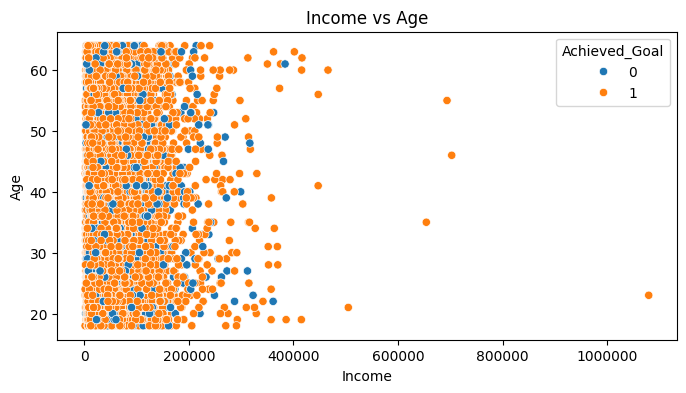

In [69]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = new_df['Income'], y = new_df['Age'], hue = new_df['Achieved_Goal'])
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Income vs Age')
plt.show()

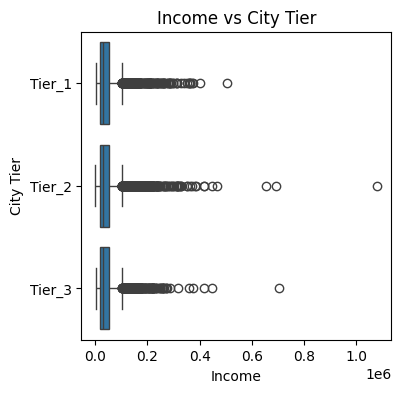

In [74]:
plt.figure(figsize=(4,4))
sns.boxplot(x= new_df['Income'], y= new_df['City_Tier'])
plt.xlabel('Income')
plt.ylabel('City Tier')
plt.title('Income vs City Tier')
plt.show()

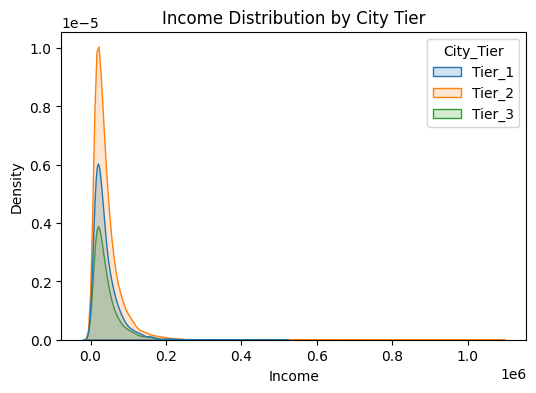

In [81]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=new_df, x='Income', hue='City_Tier', fill=True, alpha=0.2)
plt.xlabel('Income')
plt.title('Income Distribution by City Tier')
plt.show()


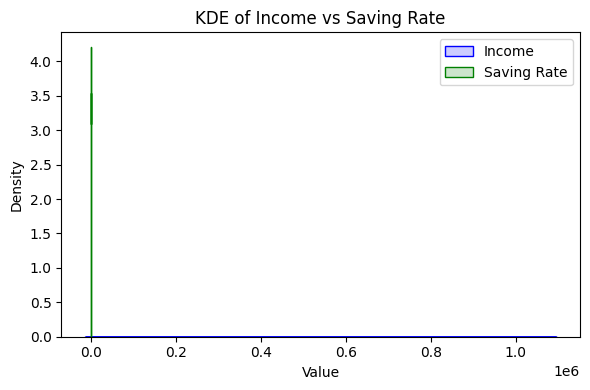